In [5]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import numpy as np
%matplotlib inline

In [6]:
class population(object):
    def __init__(self, r0, r1, infected, susceptible=None, recovered=0, time_delta=1):
        self.r0 = r0 # Infection rate
        self.r1 = r1 # Recovery rate
        self.i = infected # Population that is infected
        self.s = 1 - self.i if not susceptible else susceptible # Population that is susceptible
        self.r = recovered # Population that is recovered
        self.t = 0
        self.dt = time_delta
        
    # These are our differential equations for s, i and r
    def __sdiff(self):
        return - self.r0 * self.s * self.i

    def __idiff(self):
        return self.r0 * self.s * self.i - self.r1*self.i
    
    def __rdiff(self):
        return self.r1 * self.i
    
    def __tstep(self):
        # Euler's method
        self.s += self.__sdiff() * self.dt
        self.i += self.__idiff() * self.dt
        self.r += self.__rdiff() * self.dt
        self.t += self.dt
        return [self.t , self.s, self. i, self.r]
        
    def run(self,tmax):
        tsteps = int(tmax / self.dt)
        log = np.zeros((tsteps, 4),dtype=np.float64)
        for index in range(tsteps):
            log[index] = self.__tstep()
        return log, tsteps
        

In [7]:
# Set initial conditions
# You can change these values and see what happen

pop = population(
    r0 = 1.6,
    r1 = 0.15,
    infected = 0.01,
    time_delta = 0.05)

log, tsteps = pop.run(tmax = 25) # Run the simulation

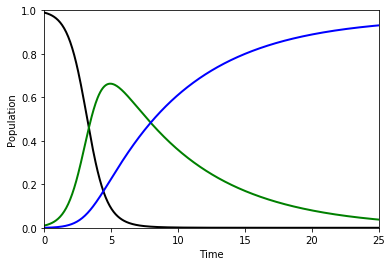

In [8]:
# This just animates the grah over time, doesn't work in the azure notebook. 
fig, ax = plt.subplots()
ax.set_xlim((0, pop.t))
ax.set_ylim((0, 1))
plt.xlabel("Time")
plt.ylabel("Population")
cols = ["black","green","blue"]
lines = [ax.plot([], [], lw=2, color = cols[l])[0] for l in range(3)]

def init(): 
    for l in lines:
        l.set_data([], [])
    return lines

def animate(i):
    t = log[:i+1, 0]
    for n, line in enumerate(lines):
        line.set_data(t, log[:i+1, n+1])
    return lines

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=tsteps, interval=50, blit=True)
HTML(anim.to_html5_video())